<a href="https://colab.research.google.com/github/TanuRajput110/Spark-Foundation-Internship/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Sparks Foundation**

**Graduate Rotational Internship (GRIP)**

**January 2023 Batch**

Candidate Name : Tanu Rajput




##**Task 3 : EDA -Retail**

Objective of the Task is to think as a business manager and try to find out the weak areas where you can work to make more profit. 

In [1]:
# Mount the google drive in google colab. 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# importing library called warning to ignore warnings.
import warnings
warnings.filterwarnings("ignore")

In [4]:
#Loading dataset
df = pd.read_csv('/content/drive/MyDrive/spark foundation/csv/task_3.csv')

In [5]:
# peeking at the first five rows
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
#shape of dataset
df.shape

(9994, 13)

In [7]:
# Data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
# checking duplicate values if any
df.duplicated().sum()

17

In [9]:
#let's just drop the duplicates
df=df.drop_duplicates()

In [10]:
#again check the duplicate values
df.duplicated().sum()

0

In [11]:
# checking the null values
df.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [12]:
#the statistical description of the features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,9977.0,55154.964117,32058.266816,1040.000,23223.0000,55901.000,90008.000,99301.000
Sales,9977.0,230.148902,623.721409,0.444,17.3000,54.816,209.970,22638.480
Quantity,9977.0,3.790719,2.226657,1.000,2.0000,3.000,5.000,14.000
Discount,9977.0,0.156278,0.206455,0.000,0.0000,0.200,0.200,0.800
Profit,9977.0,28.690130,234.457840,-6599.978,1.7262,8.671,29.372,8399.976


After digging deep into the Statistical Description ,we can see that there are outliers present in sales and profit columns.

In [13]:
# checking the correlation of the given data

df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023476,0.013110,0.059225,-0.029892
Sales,-0.023476,1.000000,0.200722,-0.028311,0.479067
Quantity,0.013110,0.200722,1.000000,0.008678,0.066211
Discount,0.059225,-0.028311,0.008678,1.000000,-0.219662
Profit,-0.029892,0.479067,0.066211,-0.219662,1.000000


##Cleaning Data

In [14]:
#drop unnecessary column
df = df.drop(['Postal Code'],axis = 1)    #dropping postal code columns

##  Checking outliers of numerical columns using seaborn boxplot

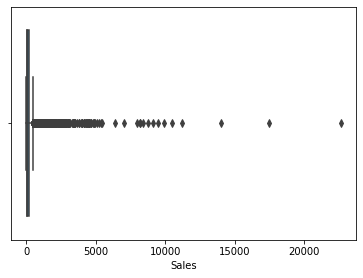

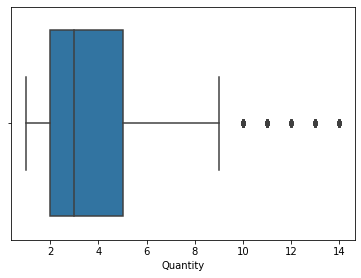

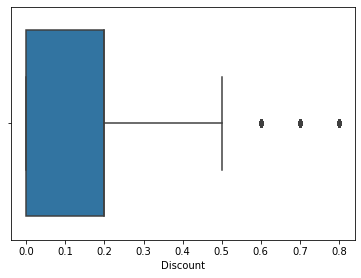

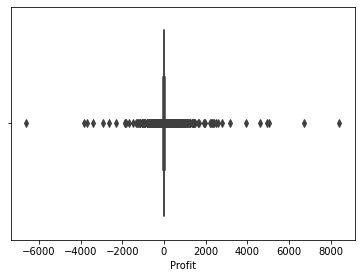

In [15]:
columns = [ 'Sales', 'Quantity', 'Discount', 'Profit']
n = 1

for column in columns:
  plt.figure(figsize=(20,15))
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()
  plt.show()

After digging deep into the above boxplots ,we can see that there are huge outliers present in sales and profit columns.so we have to treat them.

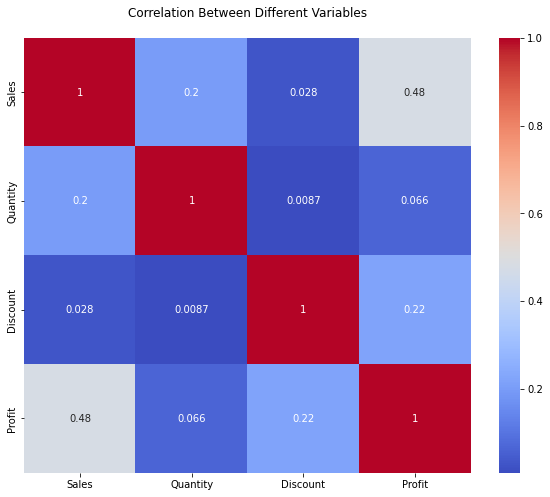

In [16]:
#Let's see the correlation visually
plt.figure(figsize=(10,8))
plt.title("Correlation Between Different Variables\n")
sns.heatmap(abs(df.corr()),cmap='coolwarm', annot=True)     
plt.show()

##**Handling Data**

In [17]:
#removing outliers for Profit Column
high_limit = 5039
print(high_limit)
low_limit = -1184.9307651
print(low_limit)
new_df = df[(df['Profit'] < high_limit) & (df['Profit'] > low_limit)]
new_df


5039
-1184.9307651


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [18]:
#removing outliers for Sales Column
high_limit =11199
print(high_limit)
low_limit =1.188
print(low_limit)
new_df = df[(df['Sales'] < high_limit) & (df['Sales'] > low_limit)]
new_df

11199
1.188


,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


##After  **cleaning data** we have **9937 rows and 12 columns**

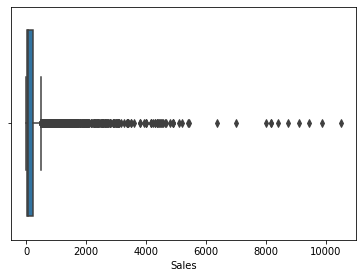

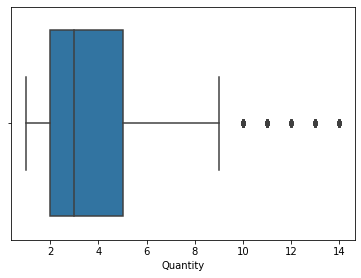

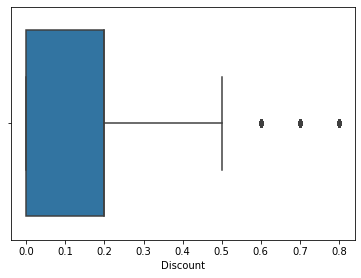

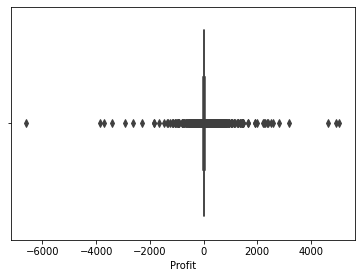

In [19]:
columns = [ 'Sales', 'Quantity', 'Discount', 'Profit']
n = 1

for column in columns:
  plt.figure(figsize=(20,15))
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(new_df[column])
  plt.tight_layout()
  plt.show()

Now We have handled outliers.Let's see the statistical description again.

In [20]:
new_df.describe()

,Sales,Quantity,Discount,Profit
count,9956.000000,9956.000000,9956.000000,9956.000000
mean,224.069975,3.794295,0.155312,27.022136
std,527.435400,2.226653,0.205180,204.166516
min,1.192000,1.000000,0.000000,-6599.978000
25%,17.437500,2.000000,0.000000,1.748325
50%,54.900000,3.000000,0.200000,8.685500
75%,209.970000,5.000000,0.200000,29.439275
max,10499.970000,14.000000,0.800000,5039.985600


##**EDA---------Let's Explore the data visually**

In [21]:
cat_col=['Ship Mode','Segment', 'Country', 'City', 'State', 'Region', 'Category',
       'Sub-Category','Quantity','Discount']

###**1.Unique Values of all columns-------------------------------**

In [22]:
#Let's see all unique value_vounts
for i in cat_col:
  print(f"unique values of ------{i}---column------")
  print(df[i].unique())
  print("\n")

unique values of ------Ship Mode---column------
['Second Class' 'Standard Class' 'First Class' 'Same Day']


unique values of ------Segment---column------
['Consumer' 'Corporate' 'Home Office']


unique values of ------Country---column------
['United States']


unique values of ------City---column------
['Henderson' 'Los Angeles' 'Fort Lauderdale' 'Concord' 'Seattle'
 'Fort Worth' 'Madison' 'West Jordan' 'San Francisco' 'Fremont'
 'Philadelphia' 'Orem' 'Houston' 'Richardson' 'Naperville' 'Melbourne'
 'Eagan' 'Westland' 'Dover' 'New Albany' 'New York City' 'Troy' 'Chicago'
 'Gilbert' 'Springfield' 'Jackson' 'Memphis' 'Decatur' 'Durham' 'Columbia'
 'Rochester' 'Minneapolis' 'Portland' 'Saint Paul' 'Aurora' 'Charlotte'
 'Orland Park' 'Urbandale' 'Columbus' 'Bristol' 'Wilmington' 'Bloomington'
 'Phoenix' 'Roseville' 'Independence' 'Pasadena' 'Newark' 'Franklin'
 'Scottsdale' 'San Jose' 'Edmond' 'Carlsbad' 'San Antonio' 'Monroe'
 'Fairfield' 'Grand Prairie' 'Redlands' 'Hamilton' 'Westfield'

###**2. Values count of each category in a categorical column-------------------------**

In [23]:
#Let's see value counts of   all required categorical column
for i in cat_col:
  print("Value_counts of-->>" ,i)
  print(df[i].value_counts())
  print('\n')
  

Value_counts of-->> Ship Mode
Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64


Value_counts of-->> Segment
Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


Value_counts of-->> Country
United States    9977
Name: Country, dtype: int64


Value_counts of-->> City
New York City      914
Los Angeles        746
Philadelphia       536
San Francisco      506
Seattle            424
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64


Value_counts of-->> State
California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona       

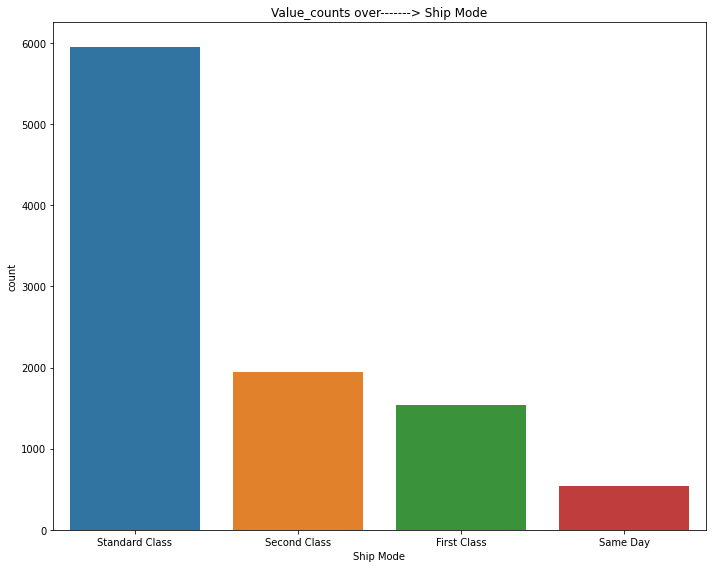

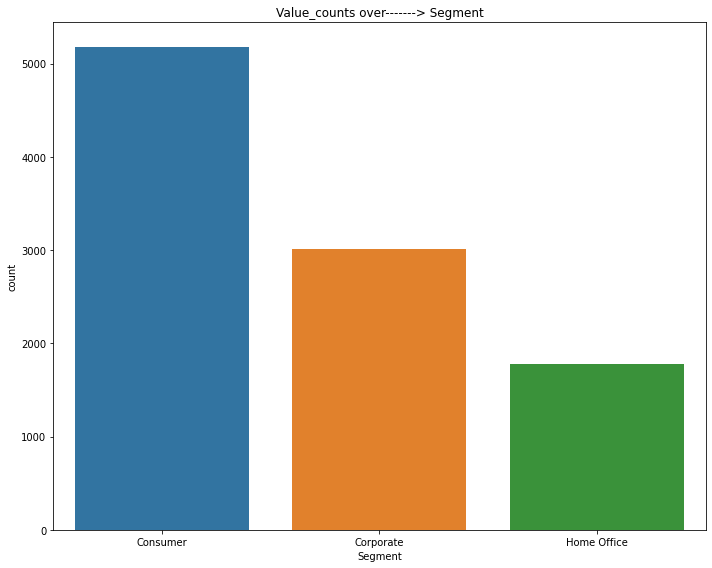

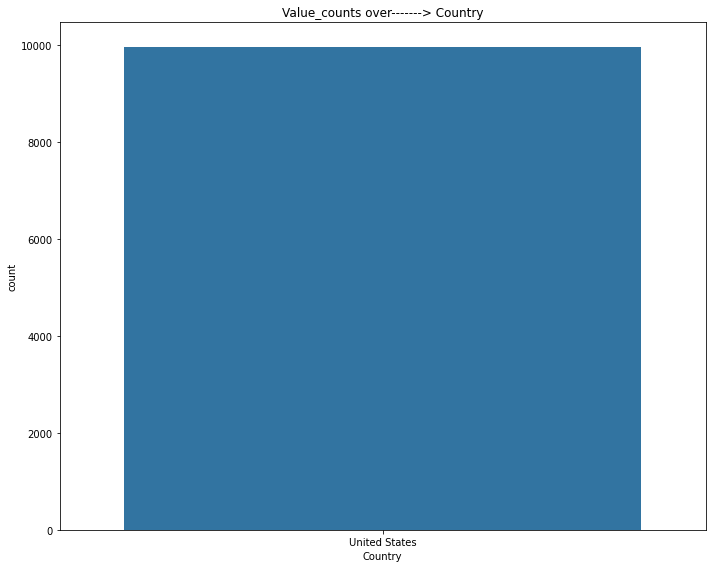

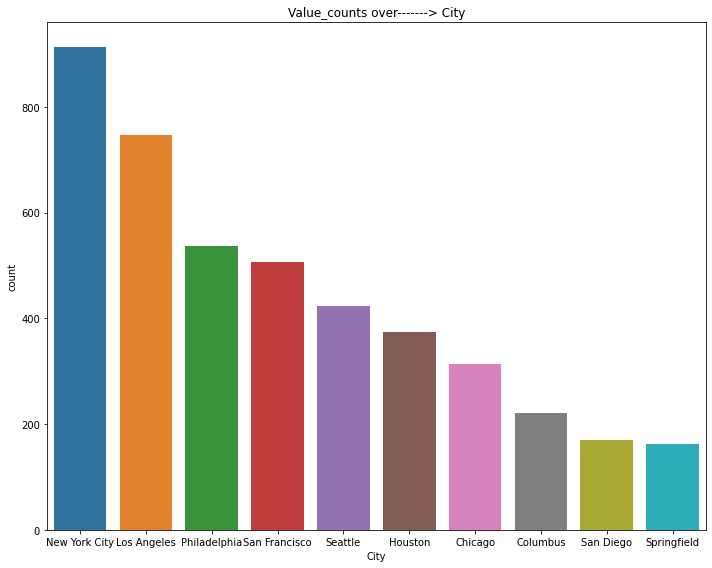

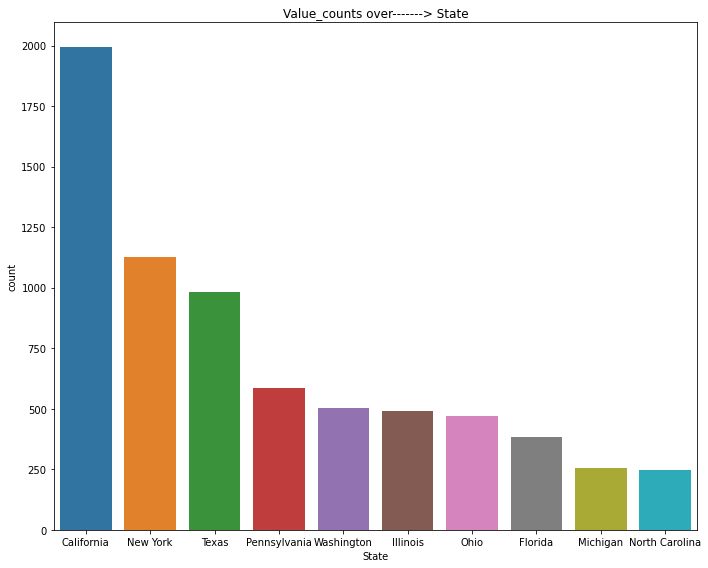

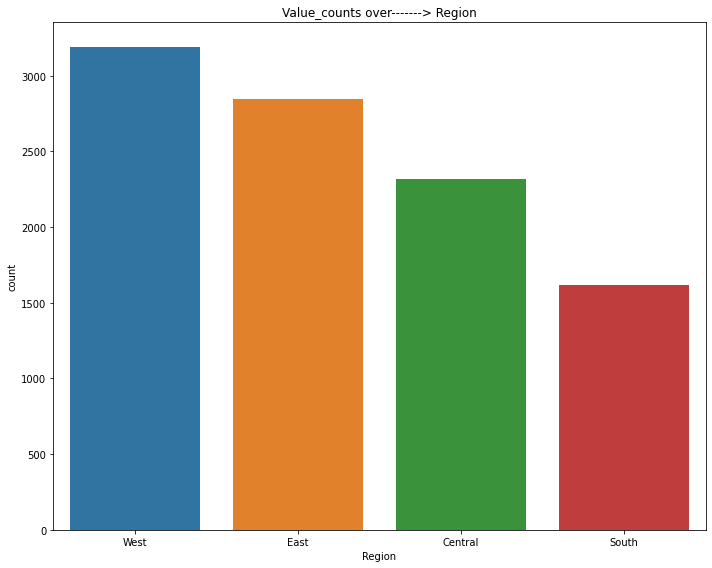

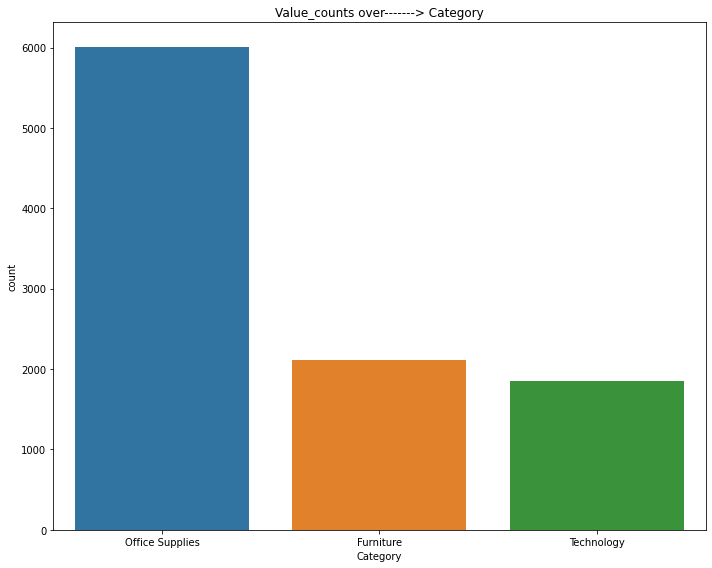

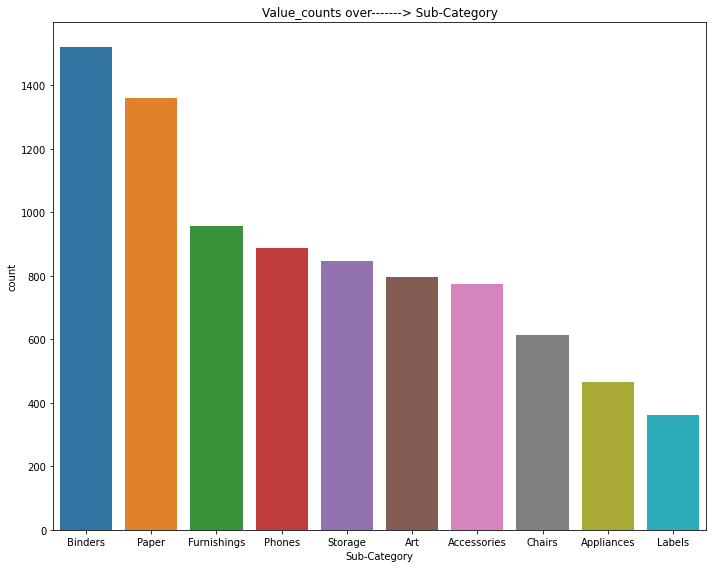

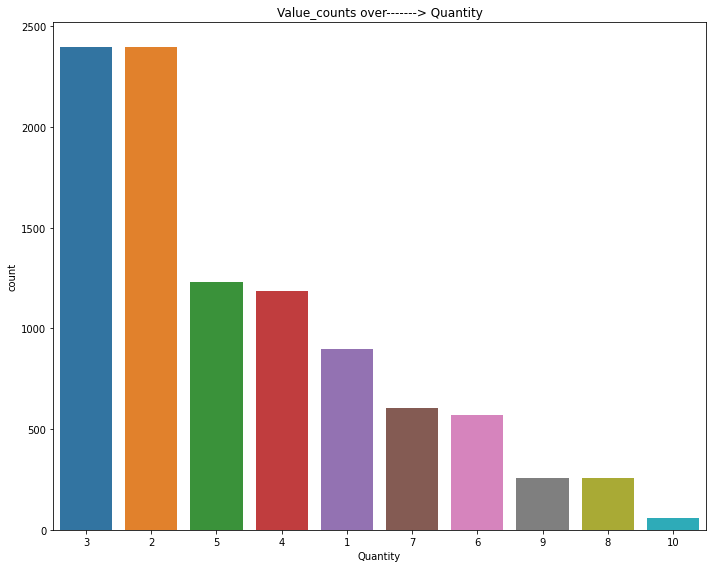

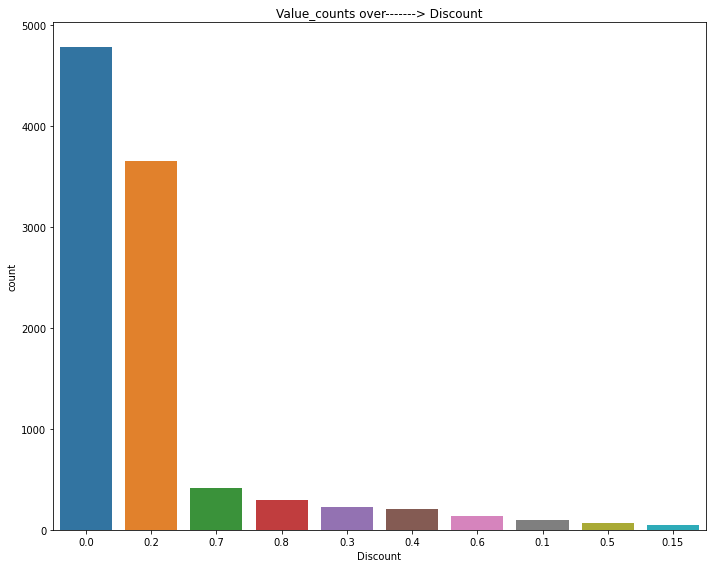

In [24]:
#Let's see all top 10  value counts visually

for i in cat_col:
  plt.figure(figsize=(10,8))
  sns.countplot(x=df[i],order = df[i].value_counts().index[0:10])
  plt.title(f"Value_counts over-------> {i}")
  plt.tight_layout()  
  plt.show()  


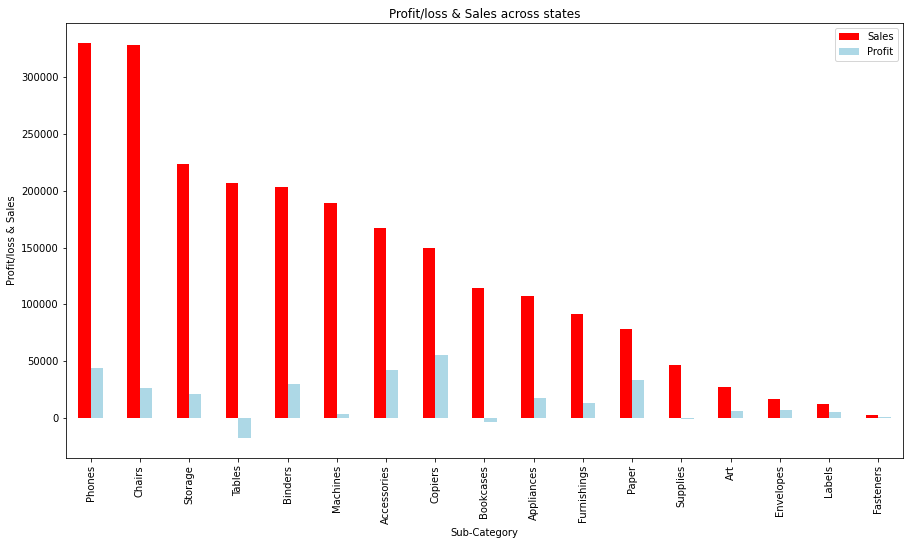

In [40]:
ps = df.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['red','lightblue'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

**Observation 1**

**a)--**.We have 4 types of Ship Mode--**Standard Class,First Class ,Secind Class and Same Day**----(In which Standard Class  has the Highest Sales)

**b)--**.We have 3 types of Segments--**Consumer,Corporate and Home office**-----(In which Consumer Segment  has the Highest Sales)

**c)--**.We have 4 types of Regions--**East,West,North and South**------(In which West Region  has the Highest Sales)

**d)--**.We have 3 types of Categories--**Furniture,Technology and office supplies**----(In which Office Supplies  has the Highest Sales)

**e)--**.We have 17 types of SubCategories--**['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']**---------(In which Binder Subcategory  has the Highest Sales).

**Observation :---**


Phones sub-category have high sales.

chairs have high sales but less profit compared to phones

Tables and Bookcases sub-categories facing huge loss

###**3.Sales,Profit  in Each shipment Mode-------------------------------**

In [25]:
col1=['Sales','Profit']

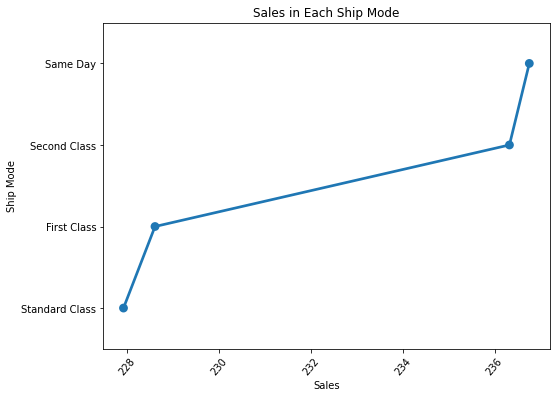

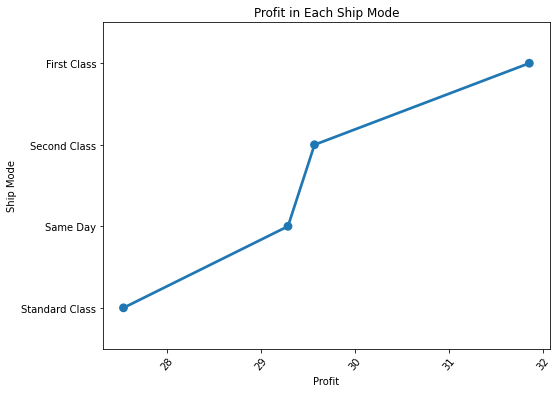

In [26]:
for i in col1:
  sp=df.groupby(['Ship Mode'],as_index=False)[i].mean().sort_values(i,ascending=False)[:5]
  plt.figure(figsize=(8,6))
  ax=sns.pointplot(x=i, y='Ship Mode',data=sp)
  plt.setp(ax.get_xticklabels(), rotation=50)
  plt.title(f'{i} in Each Ship Mode')
  ax.grid(False)


**Observation 2**

We have Lowest Sales in the Standard Class but Highest Sales on the same day,
but highest profit in First Class and Lowest Profit in Standard Class.


###**4.Sales,Profit  in Each Segment-------------------------------**

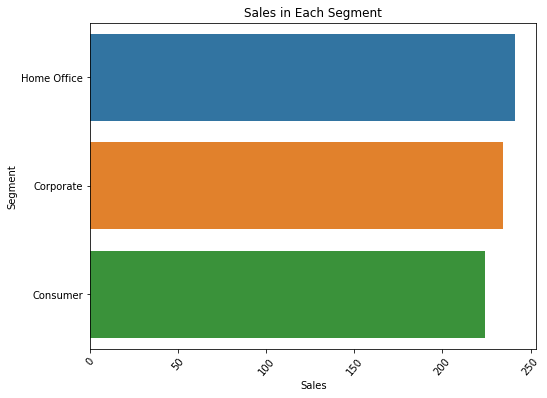

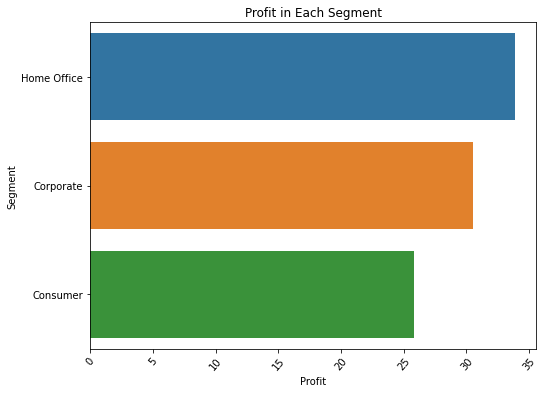

In [27]:
for i in col1:
  sp=df.groupby(['Segment'],as_index=False)[i].mean().sort_values(i,ascending=False)[:5]
  plt.figure(figsize=(8,6))
  ax=sns.barplot(x=i, y='Segment',data=sp)
  plt.setp(ax.get_xticklabels(), rotation=50)
  plt.title(f'{i} in Each Segment')
  ax.grid(False)

**Observation 3**

We have highest sales and profit in Home Office.

###**5.Sales,Profit  in Each Region-------------------------------**

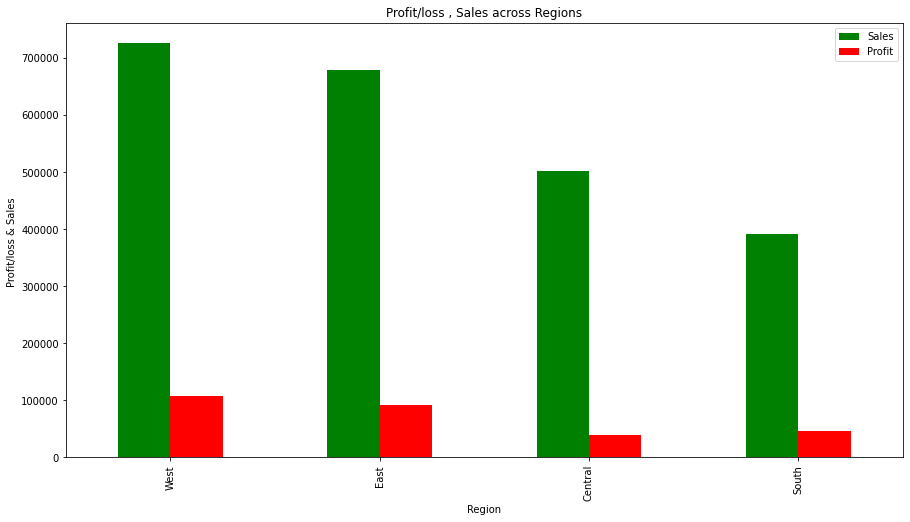

In [28]:
ps = df.groupby('Region')[col1].sum().sort_values(by='Sales',ascending=False).head(10)
ps[:].plot.bar(color=['green','red'],figsize=(15,8))
plt.title('Profit/loss , Sales across Regions')
plt.xlabel('Region')
plt.ylabel('Profit/loss & Sales ')
plt.show()

###**6.Sales,Profit  in Each State(let's get top 10 states)-------------------------------**

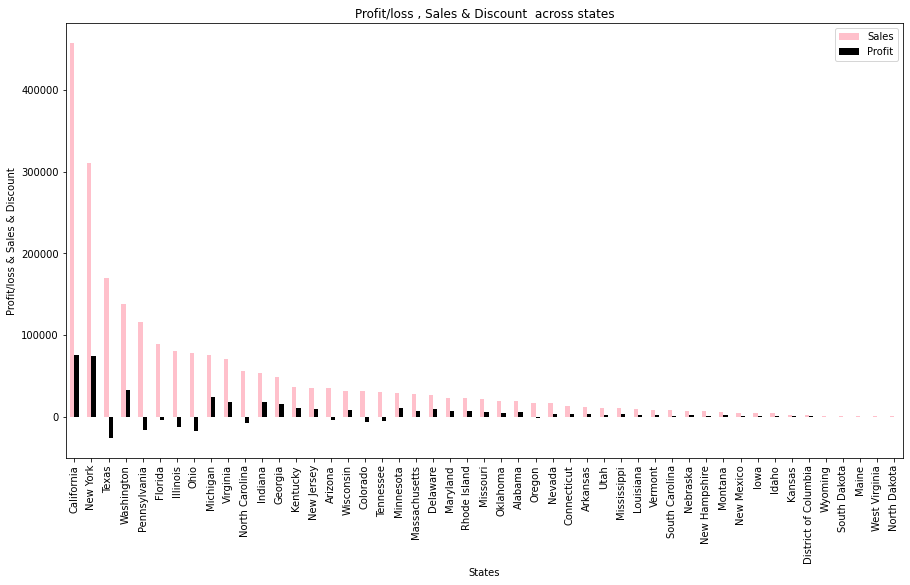

In [42]:
ps = df.groupby('State')[col1].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['pink','black'],figsize=(15,8))
plt.title('Profit/loss , Sales & Discount  across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales & Discount')
plt.show()

**Observation 4**

We have highest sales and profit across West Region because West Region States have the most number of Household Furniture Manufacturing businesses in the US.


high profit is for california, new york.

loss is for texas, pennsylvania, Ohio.

###**7.Sales,Profit  in Each Category-------------------------------**

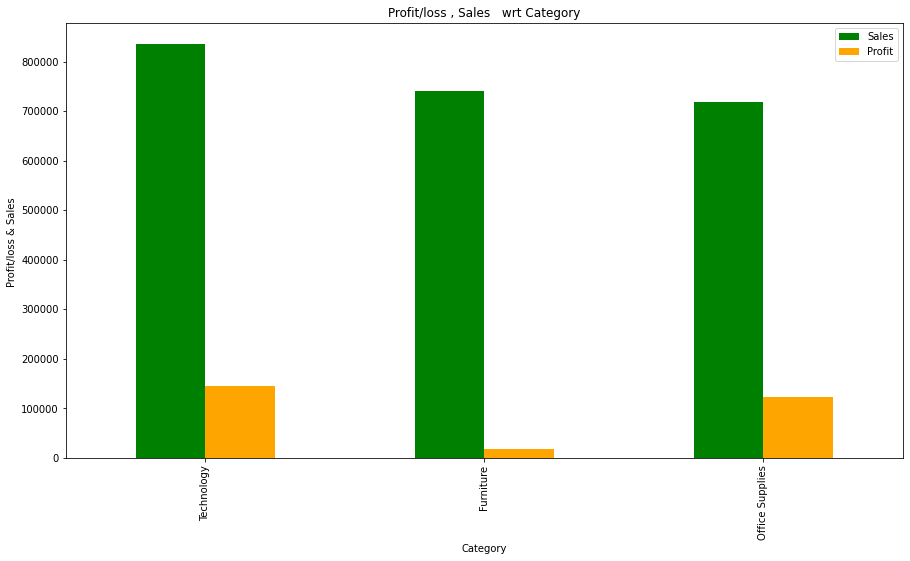

In [30]:
ps = df.groupby('Category')[col1].sum().sort_values(by='Sales',ascending=False).head(10)
ps[:].plot.bar(color=['green','orange'],figsize=(15,8))
plt.title('Profit/loss , Sales   wrt Category')
plt.xlabel('Category')
plt.ylabel('Profit/loss & Sales ')
plt.show()

**Observation 5**

We have highest sales and profit across Technology and Office Supplies Category because we all knows that  Technology helps increase the efficiency of systems, products and services,that's why in every field from smaller to bigger we need technology. and so as Offices.

So we have greater sales in these two categories.

###**8.Sales,Profit and Quantity-------------------------------**

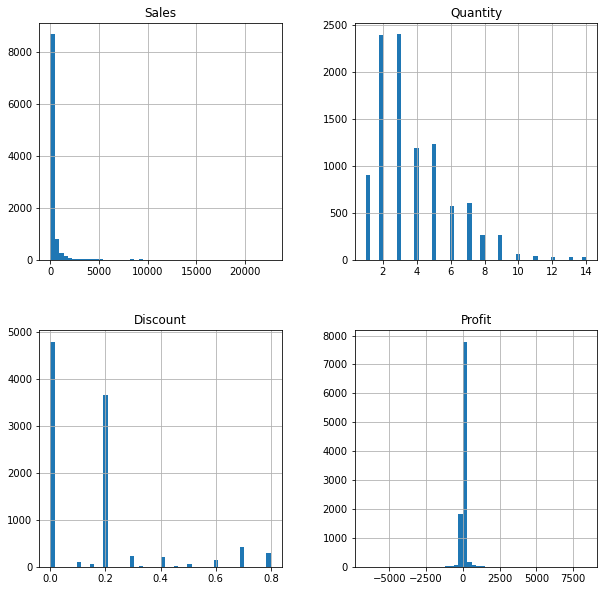

In [37]:
df.hist(figsize=(10,10),bins=50)
plt.show()

**Observation 6**

Most customers tends to buy quantity of 2 and 3

Discount give maximum is 0 to 20 percent

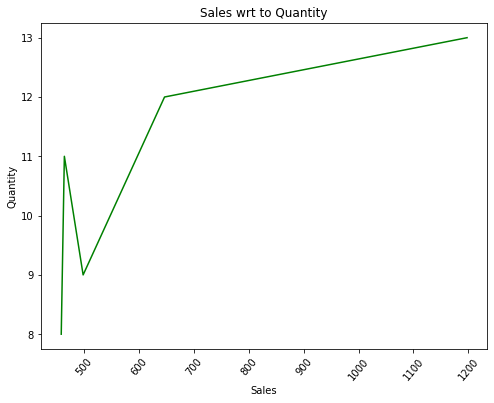

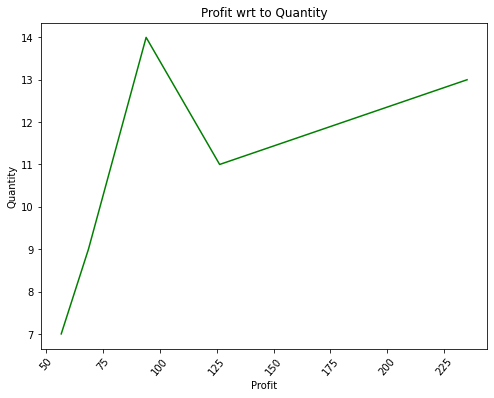

In [39]:
#Sale,Profit v/s Quantity
for i in col1:
  sp=df.groupby(['Quantity'],as_index=False)[i].mean().sort_values(i,ascending=False)[:5]
  plt.figure(figsize=(8,6))
  ax=sns.lineplot(x=i, y='Quantity',data=sp,color='green')
  plt.setp(ax.get_xticklabels(), rotation=50)
  plt.title(f'{i} wrt to Quantity')
  ax.grid(False)

**Observation 7**

There is no correlation between **sale v/s quantity** and **profit v/s quantity**

###**9.Profit v/s Discount-------------------------------**

In [32]:
col2=['Sales','Quantity','Discount']

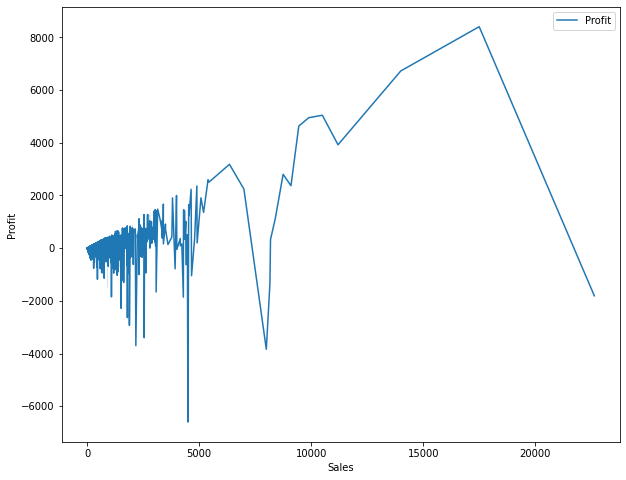

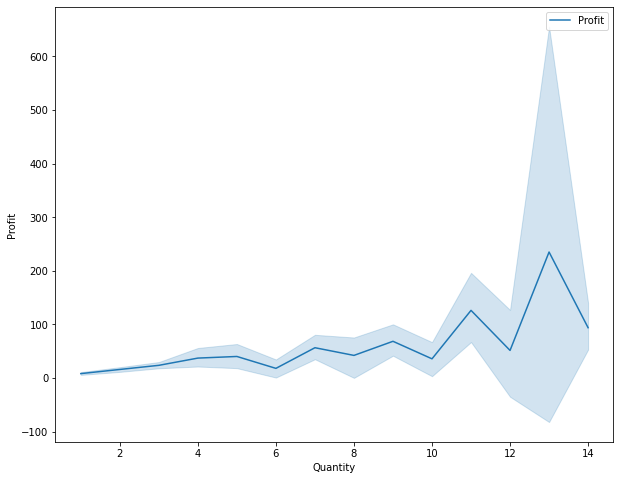

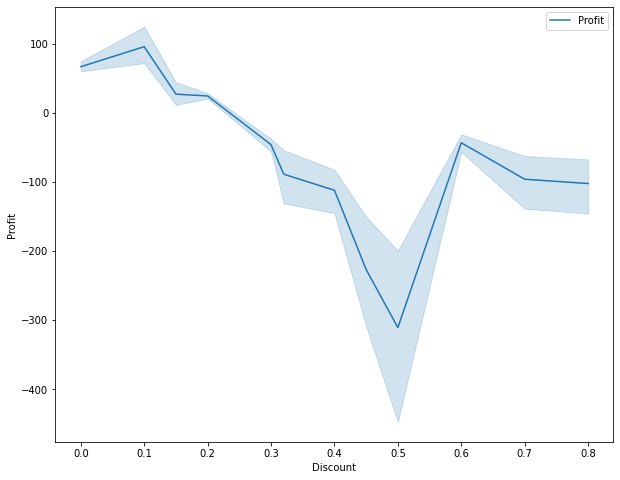

In [33]:
#profit v/s discount
for i in col2:
 plt.subplots(figsize=(10,8))
 sns.lineplot(x=i,y='Profit',label='Profit',data=df)
 plt.xlabel(i)
 plt.ylabel('Profit')
 plt.show()

**Observation 8**

There is no correlation between profit and discount.

###**10.Segment wise Sales in each Region-------------------------------**

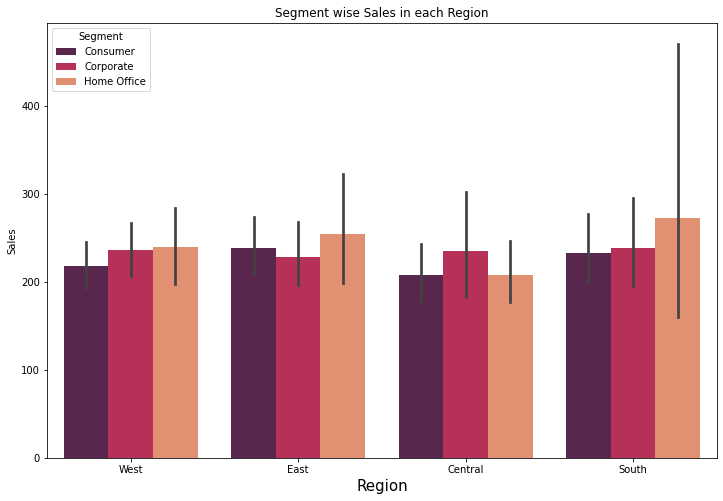

In [34]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

**Observation 9**

Segment wise sales are almost same in every region

#CONCLUSION


***As a business manager, try to find out the weak areas where you can work to make more profit?***


**1.Technology and Office Supplies** have high profit.

**2.Furniture** have less profit

**3.South and central region** have the lowest sales and profit.